In [13]:
import pandas as pd

# Load training dataset
train_df = pd.read_csv(
    "twitter_training.csv",
    header=None,
    names=["tweet_id", "entity", "sentiment", "text"]
)

# Load validation dataset
val_df = pd.read_csv(
    "twitter_validation.csv",
    header=None,
    names=["tweet_id", "entity", "sentiment", "text"]
)

In [15]:
print(train_df.shape)
print(val_df.shape)

train_df.head()

(74682, 4)
(1000, 4)


,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [17]:
combined_df = pd.concat(
    [train_df, val_df],
    axis=0,
    ignore_index=True
)

In [19]:
# Remove missing tweets
combined_df.dropna(subset=["text"], inplace=True)

# Remove duplicates
combined_df.drop_duplicates(inplace=True)

# Reset index
combined_df.reset_index(drop=True, inplace=True)

In [21]:
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72139 entries, 0 to 72138
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   72139 non-null  int64 
 1   entity     72139 non-null  object
 2   sentiment  72139 non-null  object
 3   text       72139 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


,tweet_id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [23]:
# Keep only sentiment and text
df = combined_df[["sentiment", "text"]].copy()

df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [25]:
df["sentiment"].value_counts()

sentiment
Negative      21790
Positive      19846
Neutral       17879
Irrelevant    12624
Name: count, dtype: int64

In [27]:
# Remove rows where sentiment is 'Irrelevant'
df = df[df["sentiment"] != "Irrelevant"]

# Reset index
df.reset_index(drop=True, inplace=True)

In [29]:
df["sentiment"].value_counts()

sentiment
Negative    21790
Positive    19846
Neutral     17879
Name: count, dtype: int64

In [31]:
!pip install nltk

In [33]:
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...


True

In [35]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):
        # Lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r"http\S+|www\S+", "", text)

        # Remove mentions and hashtags
        text = re.sub(r"@\w+|#\w+", "", text)

        # Remove punctuation and numbers
        text = text.translate(str.maketrans("", "", string.punctuation))
        text = re.sub(r"\d+", "", text)

        # Tokenize
        tokens = text.split()

        # Remove stopwords and lemmatize
        tokens = [
            lemmatizer.lemmatize(word)
            for word in tokens
            if word not in stop_words
        ]

        return " ".join(tokens)
    else:
        return ""

In [37]:
df["clean_text"] = df["text"].apply(preprocess_text)

df.head()

,sentiment,text,clean_text
0,Positive,im getting on borderlands and i will murder yo...,im getting borderland murder
1,Positive,I am coming to the borders and I will kill you...,coming border kill
2,Positive,im getting on borderlands and i will kill you ...,im getting borderland kill
3,Positive,im coming on borderlands and i will murder you...,im coming borderland murder
4,Positive,im getting on borderlands 2 and i will murder ...,im getting borderland murder


## Remove empty texts after preprocessing

In [40]:
df = df[df["clean_text"].str.strip() != ""]
df.reset_index(drop=True, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58145 entries, 0 to 58144
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiment   58145 non-null  object
 1   text        58145 non-null  object
 2   clean_text  58145 non-null  object
dtypes: object(3)
memory usage: 1.3+ MB


In [44]:
# Keep only sentiment and clean_text
final_df = df[["sentiment", "clean_text"]].copy()

final_df.head()

,sentiment,clean_text
0,Positive,im getting borderland murder
1,Positive,coming border kill
2,Positive,im getting borderland kill
3,Positive,im coming borderland murder
4,Positive,im getting borderland murder


In [46]:
# Dataset shape
final_df.shape

(58145, 2)

In [48]:
final_df["sentiment"].value_counts()

sentiment
Negative    21348
Positive    19365
Neutral     17432
Name: count, dtype: int64

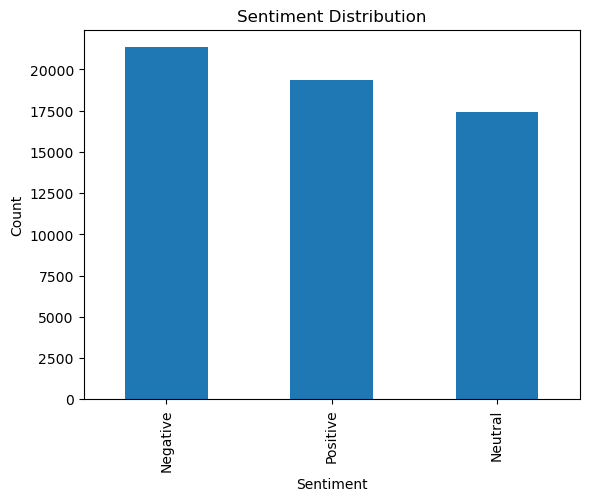

In [50]:
import matplotlib.pyplot as plt

final_df["sentiment"].value_counts().plot(kind="bar")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [52]:
final_df["text_length"] = final_df["clean_text"].apply(lambda x: len(x.split()))

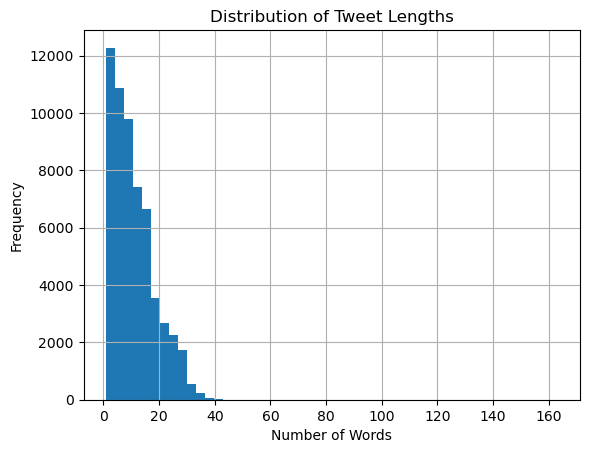

In [54]:
final_df["text_length"].hist(bins=50)
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

In [56]:
final_df.groupby("sentiment")["text_length"].mean()

sentiment
Negative    11.215149
Neutral     11.828648
Positive     9.969688
Name: text_length, dtype: float64

In [58]:
from collections import Counter

all_words = " ".join(final_df["clean_text"]).split()
word_freq = Counter(all_words)

word_freq.most_common(20)

[('game', 9176),
 ('like', 3904),
 ('get', 3802),
 ('play', 3171),
 ('im', 3084),
 ('one', 2990),
 ('time', 2939),
 ('johnson', 2869),
 ('good', 2846),
 ('new', 2818),
 ('really', 2684),
 ('love', 2551),
 ('u', 2392),
 ('shit', 2238),
 ('people', 2135),
 ('still', 2118),
 ('’', 2037),
 ('year', 2007),
 ('day', 1990),
 ('make', 1933)]

In [60]:
def top_words_by_sentiment(sentiment, n=10):
    words = " ".join(
        final_df[final_df["sentiment"] == sentiment]["clean_text"]
    ).split()
    return Counter(words).most_common(n)

# Example
top_words_by_sentiment("Positive")
top_words_by_sentiment("Negative")
top_words_by_sentiment("Neutral")

[('johnson', 1785),
 ('game', 1618),
 ('amazon', 1111),
 ('get', 1014),
 ('like', 944),
 ('u', 917),
 ('one', 880),
 ('new', 845),
 ('play', 843),
 ('google', 815)]

In [66]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
final_df["sentiment_encoded"] = label_encoder.fit_transform(final_df["sentiment"])

# Check mapping
dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

{'Negative': 0, 'Neutral': 1, 'Positive': 2}

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X = tfidf.fit_transform(final_df["clean_text"])
y = final_df["sentiment_encoded"]

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [72]:
from sklearn.linear_model import LogisticRegression

lr_baseline = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr_baseline.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [74]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_baseline = lr_baseline.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Accuracy:", baseline_accuracy)

print("\nClassification Report (Baseline):")
print(classification_report(y_test, y_pred_baseline, target_names=label_encoder.classes_))

Baseline Accuracy: 0.7566428755696964

Classification Report (Baseline):
              precision    recall  f1-score   support

    Negative       0.78      0.82      0.80      4270
     Neutral       0.72      0.67      0.70      3486
    Positive       0.76      0.77      0.76      3873

    accuracy                           0.76     11629
   macro avg       0.75      0.75      0.75     11629
weighted avg       0.76      0.76      0.76     11629



In [76]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "penalty": ["l2"]
}

grid_search = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}


In [78]:
lr_tuned = grid_search.best_estimator_

y_pred_tuned = lr_tuned.predict(X_test)

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("Tuned Accuracy:", tuned_accuracy)

print("\nClassification Report (Tuned):")
print(classification_report(y_test, y_pred_tuned, target_names=label_encoder.classes_))

Tuned Accuracy: 0.7765070083412159

Classification Report (Tuned):
              precision    recall  f1-score   support

    Negative       0.80      0.82      0.81      4270
     Neutral       0.75      0.71      0.73      3486
    Positive       0.77      0.79      0.78      3873

    accuracy                           0.78     11629
   macro avg       0.77      0.77      0.77     11629
weighted avg       0.78      0.78      0.78     11629



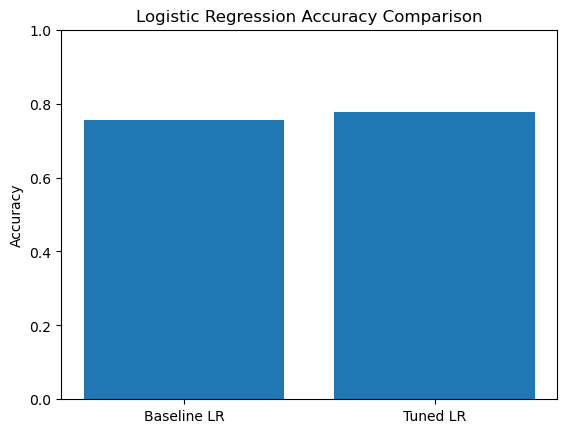

In [80]:
import matplotlib.pyplot as plt

models = ["Baseline LR", "Tuned LR"]
accuracies = [baseline_accuracy, tuned_accuracy]

plt.bar(models, accuracies)
plt.title("Logistic Regression Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [82]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

baseline_metrics = precision_recall_fscore_support(y_test, y_pred_baseline, average="weighted")
tuned_metrics = precision_recall_fscore_support(y_test, y_pred_tuned, average="weighted")

metrics_df = {
    "Metric": ["Precision", "Recall", "F1-Score"],
    "Baseline": baseline_metrics[:3],
    "Tuned": tuned_metrics[:3]
}

metrics_df

{'Metric': ['Precision', 'Recall', 'F1-Score'],
 'Baseline': (0.7555810954356305, 0.7566428755696964, 0.75569291223117),
 'Tuned': (0.7758620090803862, 0.7765070083412159, 0.7759916608334319)}

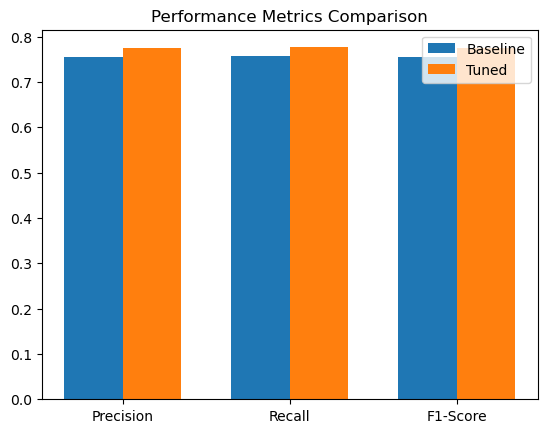

In [84]:
x = np.arange(3)
width = 0.35

plt.bar(x - width/2, baseline_metrics[:3], width, label="Baseline")
plt.bar(x + width/2, tuned_metrics[:3], width, label="Tuned")

plt.xticks(x, ["Precision", "Recall", "F1-Score"])
plt.title("Performance Metrics Comparison")
plt.legend()
plt.show()

In [86]:
from sklearn.naive_bayes import MultinomialNB

nb_baseline = MultinomialNB()

nb_baseline.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [88]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_nb_baseline = nb_baseline.predict(X_test)

nb_baseline_accuracy = accuracy_score(y_test, y_pred_nb_baseline)
print("Baseline Naive Bayes Accuracy:", nb_baseline_accuracy)

print("\nClassification Report (Baseline Naive Bayes):")
print(classification_report(
    y_test,
    y_pred_nb_baseline,
    target_names=label_encoder.classes_
))

Baseline Naive Bayes Accuracy: 0.7114111273540287

Classification Report (Baseline Naive Bayes):
              precision    recall  f1-score   support

    Negative       0.71      0.81      0.76      4270
     Neutral       0.73      0.55      0.62      3486
    Positive       0.70      0.75      0.73      3873

    accuracy                           0.71     11629
   macro avg       0.71      0.70      0.70     11629
weighted avg       0.71      0.71      0.71     11629



In [90]:
from sklearn.model_selection import GridSearchCV

param_grid_nb = {
    "alpha": [0.01, 0.1, 0.5, 1.0, 2.0]
}

grid_search_nb = GridSearchCV(
    MultinomialNB(),
    param_grid_nb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search_nb.fit(X_train, y_train)

print("Best alpha:", grid_search_nb.best_params_)

Best alpha: {'alpha': 0.01}


In [92]:
nb_tuned = grid_search_nb.best_estimator_

y_pred_nb_tuned = nb_tuned.predict(X_test)

nb_tuned_accuracy = accuracy_score(y_test, y_pred_nb_tuned)
print("Tuned Naive Bayes Accuracy:", nb_tuned_accuracy)

print("\nClassification Report (Tuned Naive Bayes):")
print(classification_report(
    y_test,
    y_pred_nb_tuned,
    target_names=label_encoder.classes_
))

Tuned Naive Bayes Accuracy: 0.7167426261931379

Classification Report (Tuned Naive Bayes):
              precision    recall  f1-score   support

    Negative       0.72      0.80      0.76      4270
     Neutral       0.72      0.58      0.64      3486
    Positive       0.71      0.75      0.73      3873

    accuracy                           0.72     11629
   macro avg       0.72      0.71      0.71     11629
weighted avg       0.72      0.72      0.71     11629



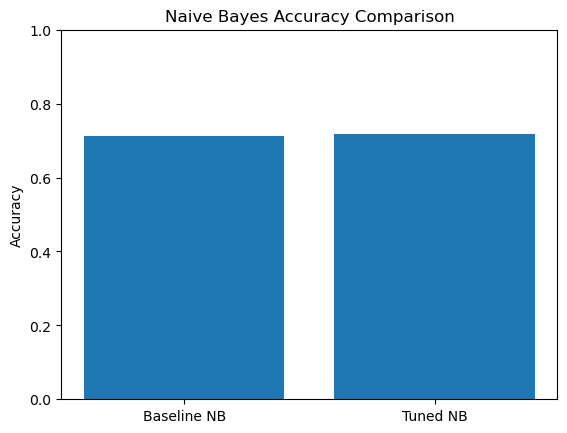

In [94]:
import matplotlib.pyplot as plt

models = ["Baseline NB", "Tuned NB"]
accuracies = [nb_baseline_accuracy, nb_tuned_accuracy]

plt.bar(models, accuracies)
plt.title("Naive Bayes Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [96]:
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

nb_baseline_metrics = precision_recall_fscore_support(
    y_test, y_pred_nb_baseline, average="weighted"
)

nb_tuned_metrics = precision_recall_fscore_support(
    y_test, y_pred_nb_tuned, average="weighted"
)

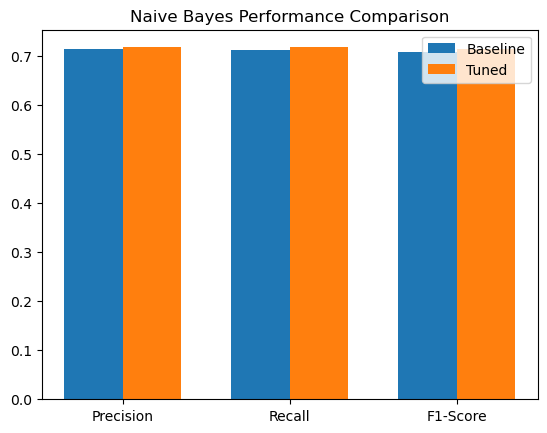

In [98]:
x = np.arange(3)
width = 0.35

plt.bar(x - width/2, nb_baseline_metrics[:3], width, label="Baseline")
plt.bar(x + width/2, nb_tuned_metrics[:3], width, label="Tuned")

plt.xticks(x, ["Precision", "Recall", "F1-Score"])
plt.title("Naive Bayes Performance Comparison")
plt.legend()
plt.show()

<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

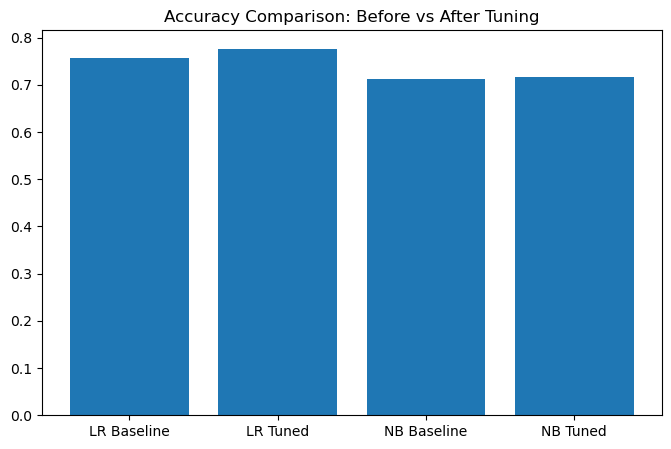

In [102]:
import matplotlib.pyplot as plt

models = [
    "LR Baseline",
    "LR Tuned",
    "NB Baseline",
    "NB Tuned"
]

accuracies = [
    baseline_accuracy,
    tuned_accuracy,
    nb_baseline_accuracy,
    nb_tuned_accuracy
]

plt.figure(figsize=(8,5))
plt.bar(models, accuracies)
plt.title("Accuracy Comparison: Before vs After Tuning")
plt.ylabel

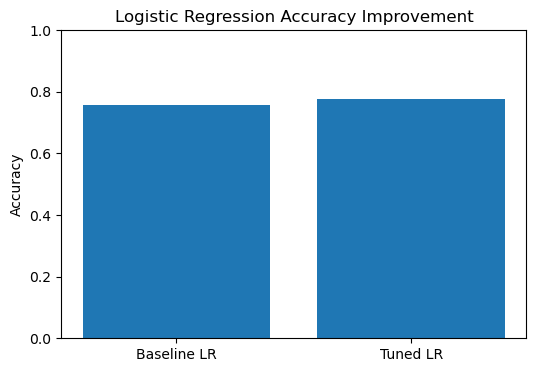

In [104]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Baseline LR", "Tuned LR"],
    [baseline_accuracy, tuned_accuracy]
)
plt.title("Logistic Regression Accuracy Improvement")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

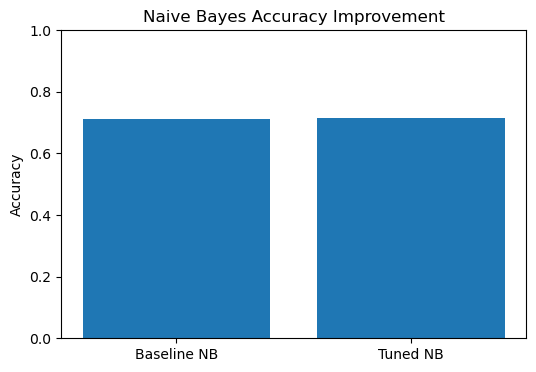

In [106]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Baseline NB", "Tuned NB"],
    [nb_baseline_accuracy, nb_tuned_accuracy]
)
plt.title("Naive Bayes Accuracy Improvement")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

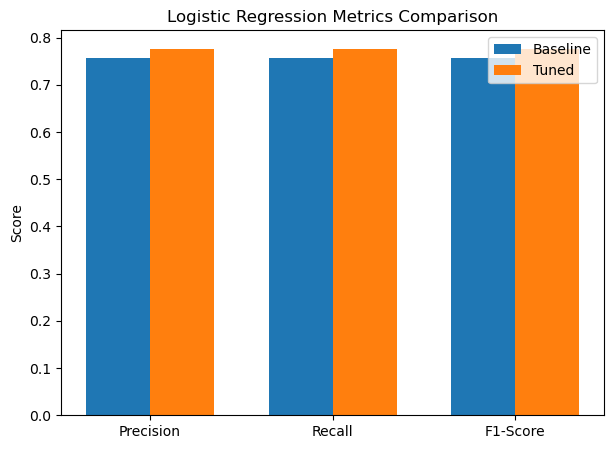

In [108]:
import numpy as np

metrics = ["Precision", "Recall", "F1-Score"]
x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(7,5))
plt.bar(x - width/2, baseline_metrics[:3], width, label="Baseline")
plt.bar(x + width/2, tuned_metrics[:3], width, label="Tuned")

plt.xticks(x, metrics)
plt.title("Logistic Regression Metrics Comparison")
plt.ylabel("Score")
plt.legend()
plt.show()

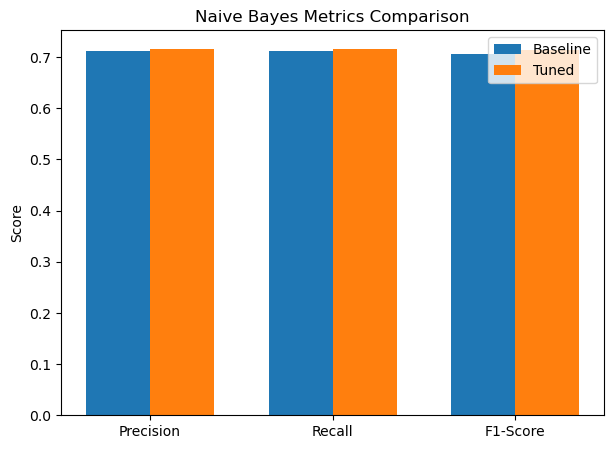

In [110]:
plt.figure(figsize=(7,5))
plt.bar(x - width/2, nb_baseline_metrics[:3], width, label="Baseline")
plt.bar(x + width/2, nb_tuned_metrics[:3], width, label="Tuned")

plt.xticks(x, metrics)
plt.title("Naive Bayes Metrics Comparison")
plt.ylabel("Score")
plt.legend()
plt.show()

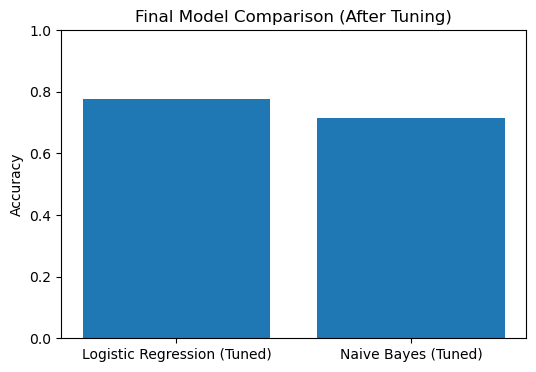

In [112]:
plt.figure(figsize=(6,4))
plt.bar(
    ["Logistic Regression (Tuned)", "Naive Bayes (Tuned)"],
    [tuned_accuracy, nb_tuned_accuracy]
)
plt.title("Final Model Comparison (After Tuning)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()